In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")

In [3]:
print("The number of observations in the housing dataset", train.shape)

The number of observations in the housing dataset (1460, 81)


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
print('Training dataset has {} rows and {} colums'.format(train.shape[0],train.shape[1]))

Training dataset has 1460 rows and 81 colums


In [7]:
pd.isnull(train).any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [10]:
#Separate categorical columns and numerical columns
cat_col = train.dtypes[train.dtypes == 'object']
num_col = train.dtypes[train.dtypes != 'object']

In [11]:
def missingvaluesinfo(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = round(df.isnull().sum().sort_values(ascending=False)/len(df)*100,2)
    temp = pd.concat([total,percent], axis=1, keys=['Total', 'Percent'])
    return temp[temp['Total'] > 0]

In [12]:
missingvaluesinfo(train)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


In [13]:
#Handling missing values

def handlemissingvalues(df):
    # for Object columns fill using 'Unknown'
    # for Numeric columns fill using 'median'
    num_col = [i for i in df.columns if df[i].dtypes in ['int64','float64']]
    cat_col = [i for i in df.columns if df[i].dtypes == 'object']
    values = {}
    for a in num_col:
        values[a]=df[a].median()
        
    for a in cat_col:
        values[a]='Unknown'

    return df.fillna(value=values, inplace=True)
    
    

In [14]:
handlemissingvalues(train)

In [15]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Unknown,Reg,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Unknown,Reg,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,12,2008,WD,Normal,250000


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

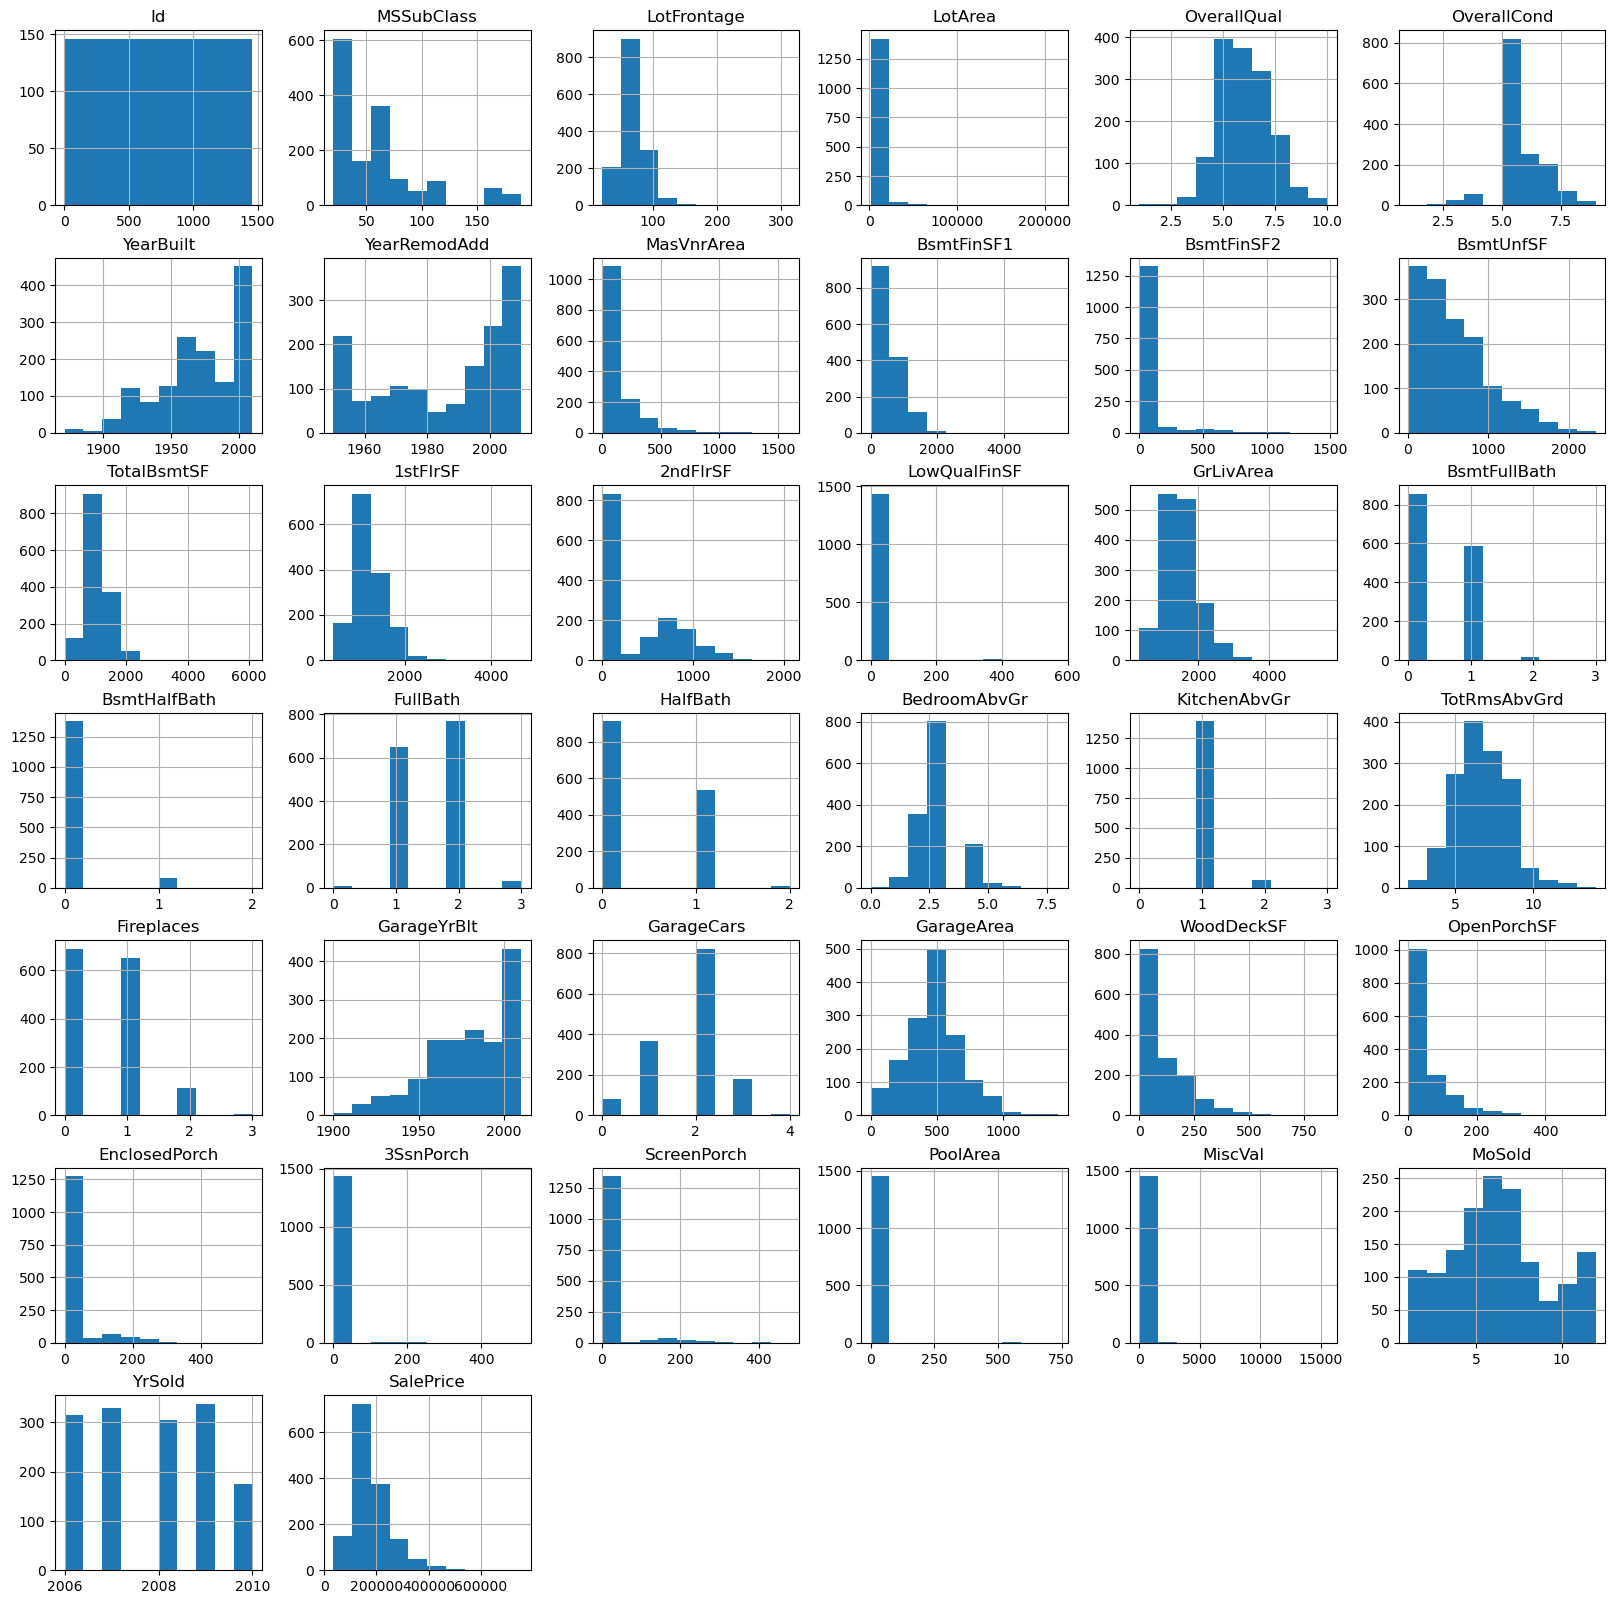

In [16]:
train[list(num_col.index)].hist(figsize = (20,20))

<Axes: >

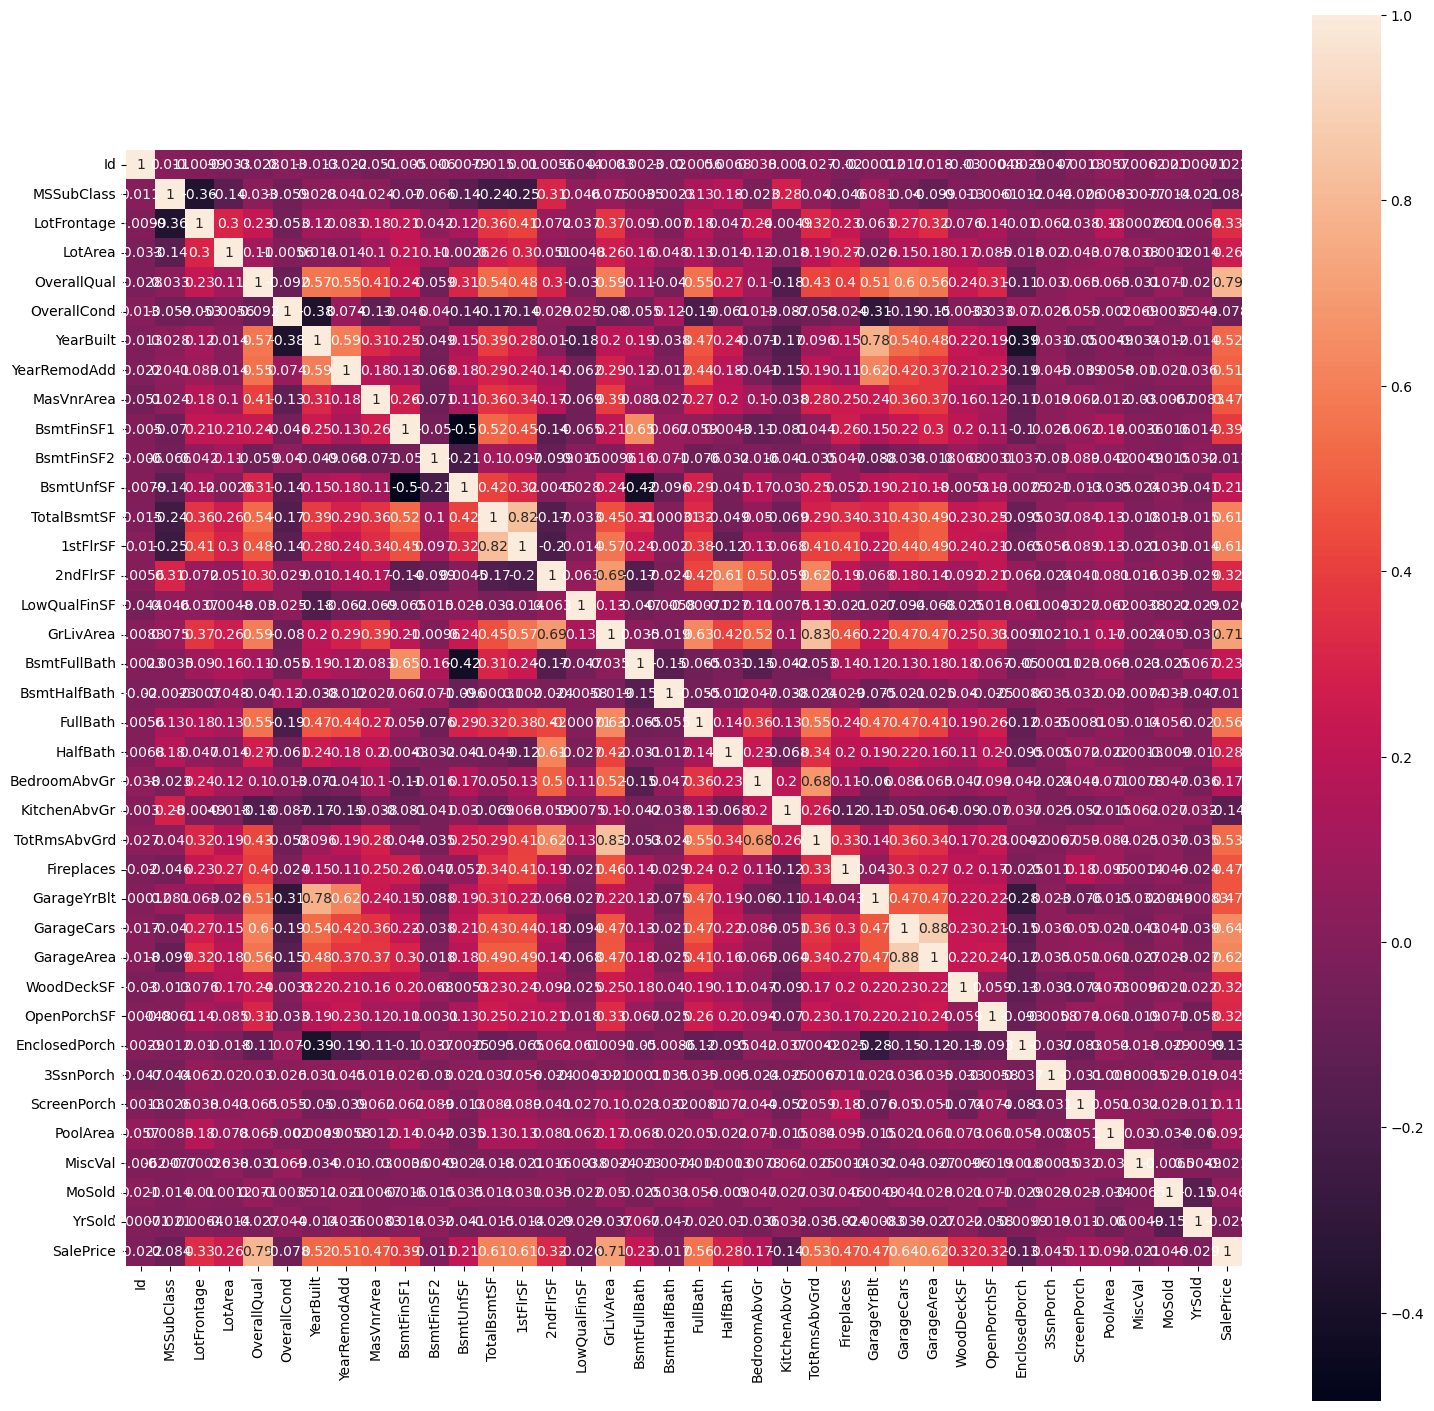

In [17]:
#setting the size of the heat map
fig = plt.figure(figsize = (18,18))
sns.heatmap(train[list(num_col.index)].corr(), annot = True, square = True)

In [18]:
#Label encoding is a simple and effective way to convert categorical variables into numerical form. Encode target labels with value between 0 and n_classes-1. This transformer should be used to encode target values, i.e. y, and not the input X.

from sklearn.preprocessing import LabelEncoder
for col in train.columns:
    if train[col].dtype == 'object':
        le = LabelEncoder()
        le.fit(list(train[col].astype(str).values) )
        train[col] = le.transform(list(train[col].astype(str).values))

In [19]:
y = train['SalePrice']
train.drop(labels = ['SalePrice'],axis = 1,inplace = True)
X = train

In [20]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,0,3,4,4,0,2,2008,8,4
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,0,3,4,4,0,5,2007,8,4


In [21]:
#I have used Robust scaler because it is not sensitve to outliers

from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
X = scaler.fit_transform(X)

# LinearRegression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))

training score: 0.8430060216261814
test score:  0.8327191886203533
r_square: 0.7770766482659928


# GridSearch

In [23]:
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
params = {'fit_intercept':[True,False], 'copy_X':[True,False]}
model1 = GridSearchCV(model, param_grid=params, n_jobs = 8, verbose = 2)
model1.fit(X_train, y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction = model1.predict(X_test)
train_score = model1.score(X_train, y_train)
test_score = model1.score(X_test, y_test)
print("training score:", train_score)
print("test score:", test_score)
from sklearn import metrics
print("r_square:", metrics.r2_score(prediction, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Hyper Parameters:
 {'copy_X': True, 'fit_intercept': False}
training score: 0.8430060216261813
test score: 0.8327191886203521
r_square: 0.7770766482659903


# KNN Regressor

In [24]:
#Without Hyper Parameters Tuning
#kNearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_jobs=8)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn.metrics import r2_score
print("r_square:",r2_score(prediction,y_test))

training score: 0.8430060216261813
test score:  0.8327191886203521
r_square: 0.09513175845486121


In [25]:
#With Hyper Parameters Tuning
#kNearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
params = {'n_neighbors':[5,6,7],
          'leaf_size':[1,2,3],
          'weights':['uniform', 'distance'],
          'algorithm':['auto','brute'],
          'n_jobs':[-1]}
model1 = GridSearchCV(model, param_grid=params,n_jobs=8, verbose=2)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
train_score=model1.score(X,y)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 7, 'weights': 'distance'}
training score: 0.8566822264557833
test score:  0.5780408195037021
r_square: 0.047146016958347414


# Polynomial Regression

In [28]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

# def PolynomialRegression(degree=2, **kwargs):
    
#     return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

# param_grid = {'polynomialfeatures__degree': np.arange(3), 'linearregression__fit_intercept': [True, False]}
# model1 = GridSearchCV(PolynomialRegression(), param_grid,cv=5,scoring='neg_mean_squared_error',verbose=3)

# model1.fit(X_train, y_train)
# best_parameters = model1.best_params_
# print(best_parameters)
# prediction=model1.predict(X_test)
# train_score=model1.score(X_train,y_train)
# test_score=model1.score(X_test,y_test)
# print ("training score:", train_score) 
# print ("test score: ", test_score)
# from sklearn import metrics
# print("r_square:",metrics.r2_score(prediction,y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END linearregression__fit_intercept=True, polynomialfeatures__degree=0;, score=-5219834819.435 total time=   0.0s
[CV 2/5] END linearregression__fit_intercept=True, polynomialfeatures__degree=0;, score=-5436115566.153 total time=   0.0s
[CV 3/5] END linearregression__fit_intercept=True, polynomialfeatures__degree=0;, score=-8316369279.711 total time=   0.0s
[CV 4/5] END linearregression__fit_intercept=True, polynomialfeatures__degree=0;, score=-5193943516.604 total time=   0.0s
[CV 5/5] END linearregression__fit_intercept=True, polynomialfeatures__degree=0;, score=-5601121902.587 total time=   0.0s
[CV 1/5] END linearregression__fit_intercept=True, polynomialfeatures__degree=1;, score=-2318109145.776 total time=   0.0s
[CV 2/5] END linearregression__fit_intercept=True, polynomialfeatures__degree=1;, score=-1072926498.868 total time=   0.0s
[CV 3/5] END linearregression__fit_intercept=True, polynomialfeatures__degree=1

# Ridge Regression

linear regression train score: 0.8430060216261814
linear regression test score: 0.8327191886203533
ridge regression train score low alpha: 0.8430059364643444
ridge regression test score low alpha: 0.8327382809503816
ridge regression train score high alpha: 0.8363651552924777
ridge regression test score high alpha: 0.8380767815679879


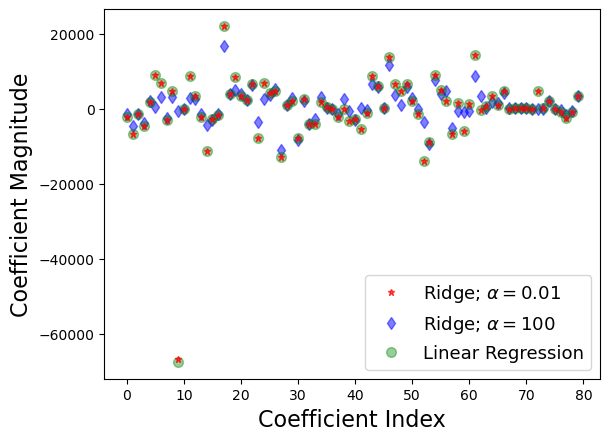

In [30]:
#Without Hyper Parameters Tuning
#Ridge
from sklearn.linear_model import Ridge
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) 
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [34]:
#With Hyper Parameters Tuning and grid search
#Ridge
ridge = Ridge(random_state=0, max_iter=10000)
alphas = [200, 230, 250,265, 270, 275, 290, 300, 500]
tuned_parameters = [{'alpha': alphas}]
n_folds = 5
model1 = GridSearchCV(ridge, tuned_parameters, cv=n_folds, n_jobs=8, verbose=2)
model1.fit(X, y)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Hyper Parameters:
 {'alpha': 200}
training score: 0.8266938024147501
test score:  0.8751295988161242
r2: 0.8751295988161242


# Lasso Regression

C:\Users\siris\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.397e+11, tolerance: 6.080e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\siris\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.568e+11, tolerance: 6.080e+08
  model = cd_fast.enet_coordinate_descent(


training score: 0.8430056033168539
test score:  0.8329278069423607
number of features used:  79
training score for alpha=0.01: 0.8430060215839482
test score for alpha =0.01:  0.8327212927324184
number of features used: for alpha =0.01: 80


C:\Users\siris\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.568e+11, tolerance: 6.080e+08
  model = cd_fast.enet_coordinate_descent(


training score for alpha=0.0001: 0.8430060216261772
test score for alpha =0.0001:  0.8327192096619521
number of features used: for alpha =0.0001: 80


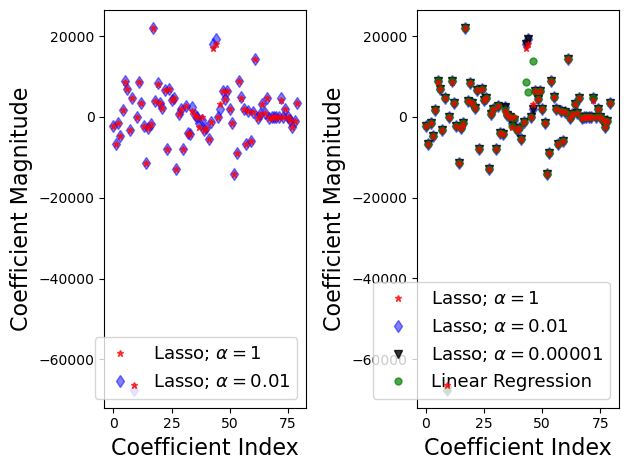

In [38]:
#Without Hyper Parameters Tuning
#Lasso
from sklearn import linear_model
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001) 
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001)
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

In [39]:
#With Hyper Parameters Tuning and grid search
#Lasso
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30, 20, 45)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, n_jobs=8, verbose=2)
clf.fit(X, y)
train_score=clf.score(X_train,y_train)
test_score=clf.score(X_test,y_test)
print("Best Hyper Parameters:\n",clf.best_params_)
prediction=clf.predict(X_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyper Parameters:
 {'alpha': 0.14907119849998599}
training score: 0.8322576822537658
test score:  0.8991335884900289
r2: 0.8991335884900289


C:\Users\siris\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.027e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(
